### Limpiar Dataset

### Leer el csv

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("recieved_dirty_dataset.csv")

### Eliminar los caracteres especiales !, &, # de las columaas

In [109]:
df.columns = df.columns.str.replace(r'[!&#]', '', regex=True)


### Eliminar Filas duplicadas 

In [110]:
df = df.drop_duplicates()

### Eliminar duplicados parciales

In [111]:
columnas_clave = ['Movie_Tag', 'Title', 'Source'] 
df = df.drop_duplicates(subset=columnas_clave, keep='first')

### Eliminar filas que contengan none

In [112]:
df = df.replace(to_replace=r'(?i)^none$', value=np.nan, regex=True)
#Convierto los strings 'none' a NaN y luego los elimino
df = df.dropna()

### Poner la columna fecha en un formato correcto

In [113]:
df['Publish_Date'] = pd.to_datetime(df['Publish_Date'], errors='coerce')


### Rango para fechas validas

In [114]:
min_date = pd.Timestamp("1900-01-01")
max_date = pd.Timestamp("2100-12-31")

df = df[(df["Publish_Date"] >= min_date) & (df["Publish_Date"] <= max_date)]

### Eliminar las frases unknwon

In [115]:
# Convierto los strings 'unknwon' a NaN y las borro
df.replace("unknwon", np.nan, inplace=True)
df.dropna()

,Movie_Tag,Title,Source,Publish_Date,Director,Key_Cast,Genre,Studio,Link,Description_Snippet
0,Avatar_Fire_and_Ash,All hail Avatar! How event movies are trying t...,The Guardian,2025-12-09 16:17:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMiyAFBV...,All hail Avatar! How event movies are trying t...
1,Avatar_Fire_and_Ash,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",Substack,2025-12-09 14:31:35,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMifkFVX...,"THE WEEKEND WARRIOR December 12, 2025 (Video E..."
3,Avatar_Fire_and_Ash,###ERROR###,Box Office Theory,2025-12-05 17:25:52,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMijgJBV...,6-Week Box Office Tracking & Forecasts: AVATAR...
4,Avatar_Fire_and_Ash,Why ‘Avatar: Fire and Ash’ Received Box Office...,Us Weekly,2025-12-08 20:54:04,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMixAFBV...,Why ‘Avatar: Fire and Ash’ Received Box Office...
6,Avatar_Fire_and_Ash,‘Avatar: Fire and Ash’ Budget is $400M+ - Worl...,World of Reel,2025-12-06 22:23:47,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMigwFBV...,‘Avatar: Fire and Ash’ Budget is $400M+&nbsp;&...
...,...,...,...,...,...,...,...,...,...,...
496,Mickey_17,'Mickey 17' Review: Robert Pattinson Is Comedy...,TheWrap,2025-02-15 08:00:00,Bong Joon-ho,"Robert Pattinson, Steven Yeun, Mark Ruffalo",Sci-Fi/Drama,Warner Bros.,https://news.google.com/rss/articles/CBMiakFVX...,'Mickey 17' Review: Robert Pattinson Is Comedy...
497,Mickey_17,'Mickey 17' Review: Bong Joon Ho’s Creativity ...,Collider,2025-03-05 08:00:00,Bong Joon-ho,"Robert Pattinson, Steven Yeun, Mark Ruffalo",Sci-Fi/Drama,Warner Bros.,https://news.google.com/rss/articles/CBMid0FVX...,'Mickey 17' Review: Bong Joon Ho’s Creativity ...
498,Mickey_17,‘Mickey 17’ review: ‘Parasite’ director’s sati...,New York Post,2025-03-05 08:00:00,Bong Joon-ho,"Robert Pattinson, Steven Yeun, Mark Ruffalo",Sci-Fi/Drama,Warner Bros.,https://news.google.com/rss/articles/CBMiogFBV...,‘Mickey 17’ review: ‘Parasite’ director’s sati...
510,Avatar_Fire_and_Ash,SEGA Corporation - 株式会社セガ,株式会社セガ,2025-01-22 08:00:00,Jeff Fowler,"Ben Schwartz, Jim Carrey, Keanu Reeves (Shadow...",Action/Adventure,Paramount,https://news.google.com/rss/articles/CBMiW0FVX...,SEGA Corporation&nbsp;&nbsp;株式会社セガ


### Eliminar filas que tengas ###ERROR###

In [116]:
df = df[~df.apply(lambda row: row.astype(str).str.contains("###ERROR###").any(), axis=1)]

### Eliminar cualquier valor que empiece por {  o termine por }

In [117]:
df['Source'] = df['Source'].replace(to_replace=r'^\{.*\}$', value=np.nan, regex=True)

# Eliminar filas con NaN en 'Source'
df.dropna(subset=['Source'], inplace=True)


### Guardar el csv limpio

In [118]:
df.to_csv("clean_dataset.csv", index=False, encoding="utf-8")

In [119]:
df = pd.read_csv("clean_dataset.csv")

### Analisis

In [120]:

categorical_cols = ['Movie_Tag', 'Title', 'Source', 'Publish_Date', 'Director', 'Key_Cast', 'Genre', 'Studio', 'Link', 'Description_Snippet']

print("Moda de cada columna categórica:")
for col in categorical_cols:
    print(f"{col}: {df[col].mode().values}")


Moda de cada columna categórica:
Movie_Tag: ['Sonic_3']
Title: ["Box Office: No, 'Avatar 3' Does Not Need a Huge Opening Weekend - The Outside Scoop | Scott Mendelson"
 "Christmas movie review roundup: 'Nosferatu,' 'Better Man,' 'Los Frikis' and 'The Fire Inside' - Substack"
 'NOSFERATU (2024) - CULTURE CRYPT' 'SEGA Corporation - 株式会社セガ']
Source: ['GamesRadar+']
Publish_Date: ['2025-03-07 08:00:00']
Director: ['Jeff Fowler']
Key_Cast: ['Ben Schwartz, Jim Carrey, Keanu Reeves (Shadow), Idris Elba']
Genre: ['Action/Adventure']
Studio: ['Paramount']
Link: ['https://news.google.com/rss/articles/CBMiW0FVX3lxTE54UnVZQ0F1amJXOGZ4QVhwQTR0OUxvQkoxUDNId0YzY2ktd3l6RDQtX0dwZHpIVXMzX0hCd3h3TmhhRjgwcTBxUHhLUUUxcHgtdi1BYU9yWDloSW8?oc=5'
 'https://news.google.com/rss/articles/CBMiY0FVX3lxTE42SWY3R2hzQUJkOVcyZk1oNnZSbmpla05rUUNIWTFzV010ZUlkX1luSU5wZFloWWFPdUc4MmxiOS1sTEFITkhzMXQzcWFDUjhnSW9IdEVpR2syU0JqZWtFdTZqMA?oc=5'
 'https://news.google.com/rss/articles/CBMigwFBVV95cUxQYnBwZ2d6dmdqQkhBeFVrVlBKbHJwa

In [121]:
print("\nNúmero de valores únicos por columna:")
print(df[categorical_cols].nunique())



Número de valores únicos por columna:
Movie_Tag                5
Title                  434
Source                 193
Publish_Date           254
Director                 5
Key_Cast                 5
Genre                    5
Studio                   5
Link                   433
Description_Snippet    433
dtype: int64


In [122]:
df['Publish_Date'] = pd.to_datetime(df['Publish_Date'], errors='coerce')

print("\nResumen de fechas:")
print("Fecha mínima:", df['Publish_Date'].min())
print("Fecha máxima:", df['Publish_Date'].max())
print("Fecha más frecuente:", df['Publish_Date'].mode().values)



Resumen de fechas:
Fecha mínima: 2020-11-22 08:00:00
Fecha máxima: 2025-12-09 18:20:00
Fecha más frecuente: ['2025-03-07T08:00:00.000000000']


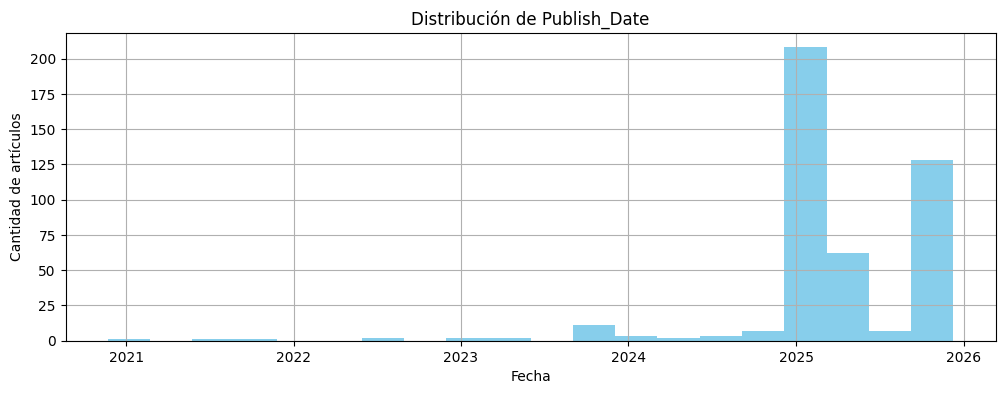

In [123]:
plt.figure(figsize=(12,4))
df['Publish_Date'].hist(bins=20, color='skyblue')
plt.title("Distribución de Publish_Date")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de artículos")
plt.show()


# 📊 Análisis del Dataset Limpio

## 1️⃣ Limpieza del Dataset

Se realizaron estos pasos para asegurar la calidad de los datos y evitar resultados erróneos en el análisis:

- **Eliminación de símbolos en nombres de columnas**  
  Se eliminaron los caracteres `!`, `&` y `#` de los nombres de columnas para evitar problemas al manipular los datos.

- **Eliminación de duplicados**  
  - Se eliminaron filas completamente duplicadas.  
  - Se eliminaron duplicados parciales considerando las columnas clave: `Movie_Tag`, `Title` y `Source`.

- **Conversión de valores 'none' a NaN y eliminación de filas**  
  Todos los valores `"none"` (insensible a mayúsculas/minúsculas) se convirtieron a `NaN` y luego se eliminaron las filas correspondientes.

- **Normalización de fechas**  
  - La columna `Publish_Date` se convirtió a tipo `datetime`.  
  - Se filtraron las fechas para que solo queden dentro del rango válido (1900-01-01 a 2100-12-31), evitando outliers.

- **Eliminación de valores inválidos**  
  - Se eliminaron filas con `"unknwon"`.  
  - Se eliminaron filas que contenían `###ERROR###`.  
  - Se eliminaron filas cuya columna `Source` comenzaba con `{` o terminba con `}` o estaba mal formateada como JSON.

- **Guardado del dataset limpio**  
  El dataset final se guardó como CSV con codificación UTF-8.


Todos estos pasos son útiles para garantizar que el análisis posterior (estadísticas, gráficas...) no se vea afectado por valores duplicados,incorrectos, asi asegura resultados confiables.


Se puede observar que la limpieza se hizo correctamente ya que antes en la columna Publsh_Date habia valores ocon outliyers y ahora estan en un rango mas normal

- **Fecha menor:** `2020-11-22 08:00:00`  
  Esto indica el artículo más antiguo presente en el dataset.

- **Fecha máxima:** `2025-12-09 18:20:00`  
  Este es el artículo más reciente registrado.

- **Fecha más frecuente:** `2025-03-07`  
  La fecha que aparece con mayor frecuencia en el dataset. Indica un pico de publicaciones en esa fecha.

> 🔹 La limpieza previa asegura que estas estadísticas no se vean afectadas por valores inválidos, outliers o errores de formato.
